# p27: Solve KdV equation

Solve the KdV equation using FFT
$$
u_t + u u_x + u_{xxx} = 0, \qquad x \in [-\pi,\pi]
$$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from matplotlib import rc
rc('animation', html='jshtml')
from numpy import pi,cosh,exp,round,zeros,arange,real,mod
from numpy.fft import fft,ifft
import matplotlib.pyplot as plt

In [2]:
# Set up grid and differentiation matrix:
N = 256; dt = 0.4/N**2; x = (2*pi/N)*arange(-N/2,N/2);
A, B = 25.0, 16.0
u = 3*A**2/cosh(0.5*A*(x+2))**2 + 3*B**2/cosh(0.5*B*(x+1))**2
v = fft(u); 
k = zeros(N); k[0:N//2] = arange(0,N/2); k[N//2+1:] = arange(-N/2+1,0,1)
ik3 = 1j*k**3

# Time-stepping by Runge-Kutta
tmax = 0.006; nplt = 5 #int(round((tmax/25)/dt))
nmax = int(round(tmax/dt))
udata = []; udata.append(u)
tdata = [0.0]
for n in range(1,nmax+1):
    t = n*dt; g = -0.5j*dt*k
    E = exp(dt*ik3/2); E2 = E**2
    a = g * fft(real(ifft( v         ))**2)
    b = g * fft(real(ifft( E*(v+a/2) ))**2)
    c = g * fft(real(ifft( E*v+b/2   ))**2)
    d = g * fft(real(ifft( E2*v+E*c  ))**2)
    v = E2*v + (E2*a + 2*E*(b+c) + d)/6
    if mod(n,nplt) == 0:
        u = real(ifft(v))
        udata.append(u)
        tdata.append(t);

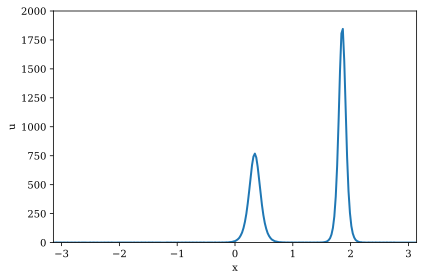

In [3]:
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-pi, pi), ylim=(0, 2000))
line, = ax.plot([], [], lw=2)
plt.xlabel('x'); plt.ylabel('u')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    line.set_data(x, udata[i])
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(udata), interval=50, blit=True)
# Save to file
try:
    anim.save('p27.mp4', fps=20, extra_args=['-vcodec', 'libx264'])
except:
    print("Cannot save mp4 file")

In [4]:
# Use this for inline display with controls
anim

# Use this for inline display of movie
#from IPython.display import HTML
#HTML(anim.to_html5_video())